In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
import plotly.express as px

#Descriptive statistics

In [3]:
mpg = pd.read_csv('/mpg.csv', usecols = ['mpg', 'weight', 'horsepower', 'origin', 'cylinders'])
mpg.head()

,mpg,cylinders,horsepower,weight,origin
0,18.0,8,130,3504,USA
1,15.0,8,165,3693,USA
2,18.0,8,150,3436,USA
3,16.0,8,150,3433,USA
4,17.0,8,140,3449,USA


In [4]:
#Descriptive statistics
mpg.describe()

,mpg,cylinders,horsepower,weight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184
std,7.805007,1.705783,38.491160,849.402560
min,9.000000,3.000000,46.000000,1613.000000
25%,17.000000,4.000000,75.000000,2225.250000
50%,22.750000,4.000000,93.500000,2803.500000
75%,29.000000,8.000000,126.000000,3614.750000
max,46.600000,8.000000,230.000000,5140.000000


In [5]:
#frequency of categories in a variable origin
origin_count = pd.crosstab(index=mpg['origin'], columns='count')
origin_count

col_0,count
origin,
Asia,79
Europe,68
USA,245


In [6]:
#frequency of categories in a variable origin with cylinders
pd.crosstab(index=mpg['origin'], columns=mpg['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
Asia,4,69,0,6,0
Europe,0,61,3,4,0
USA,0,69,0,73,103


In [7]:
#descriptive mpg statistics for each origin
mpg.groupby('origin').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Asia,79.0,30.450633,6.090048,18.0,25.70,31.6,34.050,46.6
Europe,68.0,27.602941,6.580182,16.2,23.75,26.0,30.125,44.3
USA,245.0,20.033469,6.440384,9.0,15.00,18.5,24.000,39.0


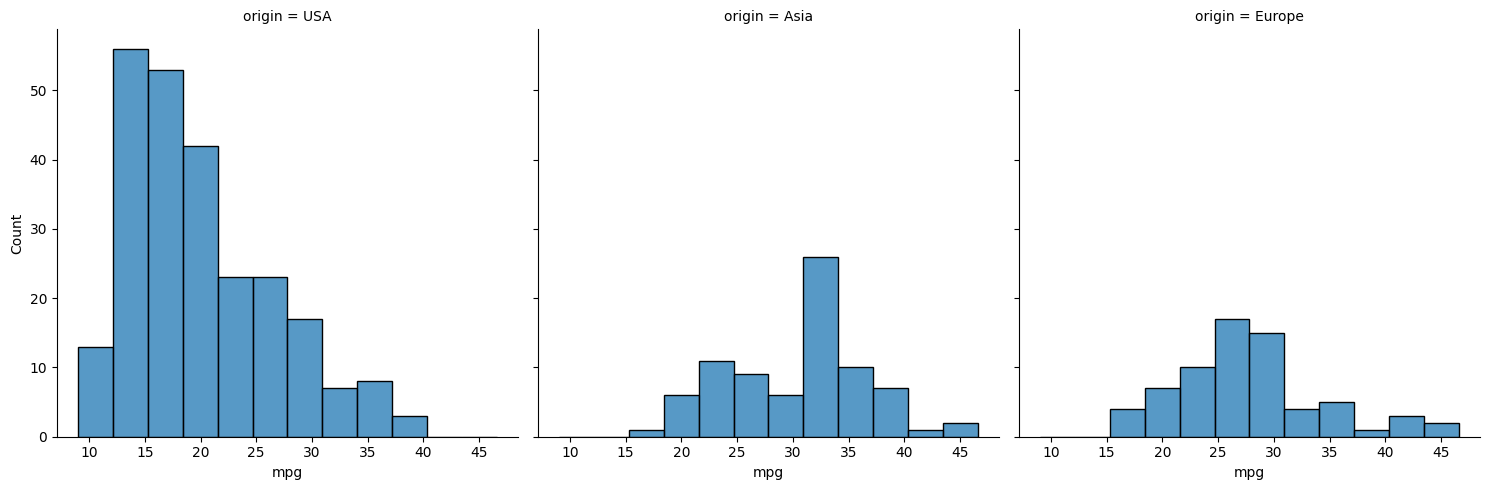

In [11]:
sns.displot(data=mpg, x='mpg', col='origin')

In [31]:
px.box(mpg, x = 'origin', y = 'mpg', template='seaborn')

# hypothesis testing

In [16]:
usa_cars = mpg[mpg['origin']=='USA']
europe_cars = mpg[mpg['origin']=='Europe']
usa_cars

,mpg,cylinders,horsepower,weight,origin
0,18.0,8,130,3504,USA
1,15.0,8,165,3693,USA
2,18.0,8,150,3436,USA
3,16.0,8,150,3433,USA
4,17.0,8,140,3449,USA
...,...,...,...,...,...
386,27.0,4,90,2950,USA
387,27.0,4,86,2790,USA
389,32.0,4,84,2295,USA
390,28.0,4,79,2625,USA


t-test for independent samples

In [15]:
stats.ttest_ind(usa_cars['mpg'], europe_cars['mpg'])

TtestResult(statistic=-8.534455914399228, pvalue=6.306531719750568e-16, df=311.0)

In [25]:
mpg[['mpg', 'horsepower', 'weight']].corr()

,mpg,horsepower,weight
mpg,1.000000,-0.778427,-0.832244
horsepower,-0.778427,1.000000,0.864538
weight,-0.832244,0.864538,1.000000


In [30]:
px.scatter(mpg, x = 'weight', y = 'mpg', title = 'correlation of weight and mpg', color = 'horsepower', template='seaborn')

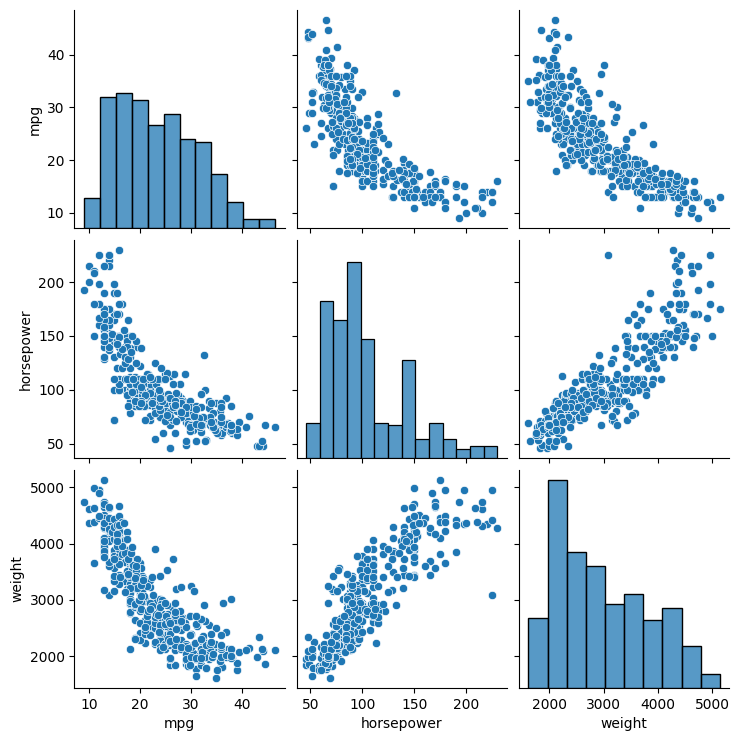

In [28]:
sns.pairplot(mpg[['mpg', 'horsepower', 'weight']])

linear regression

In [33]:
stats.linregress(x=mpg['weight'], y=mpg['mpg'])

LinregressResult(slope=-0.007647342535779578, intercept=46.21652454901758, rvalue=-0.8322442148315754, pvalue=6.015296051435726e-102, stderr=0.0002579632782734318, intercept_stderr=0.7986724633128348)

In [36]:
px.scatter(mpg, x='weight', y='mpg', trendline='ols', template='seaborn')

In [39]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(mpg[['weight']], mpg[['mpg']])

In [43]:
y_train.shape

(294, 1)

In [44]:
y_test.shape

(98, 1)

In [45]:
#create a linear regression object
regr = linear_model.LinearRegression()

In [46]:
#train a model using training kits
regr.fit(X_train, y_train)

LinearRegression()

In [47]:
#make predictions using the training kit
y_pred = regr.predict(X_test)

In [50]:
y_pred[:5]

array([[16.43061397],
       [23.72115143],
       [27.90833712],
       [27.47168461],
       [25.86542716]])

In [51]:
regr.coef_ #coefficient of the learning model

array([[-0.00779737]])

In [52]:
metrics.r2_score(y_test, y_pred)

0.7677484341440131

In [53]:
metrics.mean_squared_error(y_test, y_pred)

11.259508514419501